In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import datetime

In [2]:
train_df = pd.read_csv('./data/train_users_2.csv')
test_df = pd.read_csv('./data/test_users.csv')

In [3]:
train_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
test_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


In [7]:
train_df.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [8]:
train_df.isnull().sum(axis=0)

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [9]:
train_features = train_df.columns
test_features = test_df.columns

np.setdiff1d(train_features,test_features)

array(['country_destination'], dtype=object)

# 1. datetime features
## 1.1 date_account_created

In [10]:
# dac_df = train_df['date_account_created'].value_counts()     ....pycharm
dac_df = train_df.date_account_created.value_counts()
dac_df.describe()

count    1634.000000
mean      130.630967
std       139.327895
min         1.000000
25%        15.000000
50%        79.000000
75%       201.000000
max       674.000000
Name: date_account_created, dtype: float64

* 같은 결과 나온다
```python
train_df.groupby('date_account_created')['date_account_created'].count().describe()
```
```python
data_df.date_account_created.value_counts().describe()
```


In [11]:
dac_train = train_df.date_account_created.value_counts()
dac_test = test_df.date_account_created.value_counts()

print('dac_train:\n')
print(dac_train.head())
print(dac_train.tail())
print('\ndac_test:\n')
print(dac_test.head())
print(dac_test.tail())

dac_train:

2014-05-13    674
2014-06-24    670
2014-06-25    636
2014-05-20    632
2014-05-14    622
Name: date_account_created, dtype: int64
2010-01-19    1
2010-04-24    1
2010-01-31    1
2010-02-14    1
2010-01-01    1
Name: date_account_created, dtype: int64

dac_test:

2014-07-23    1105
2014-07-22    1052
2014-07-17     978
2014-07-24     923
2014-07-18     892
Name: date_account_created, dtype: int64
2014-07-06    475
2014-07-12    472
2014-07-04    445
2014-07-05    421
2014-07-13    401
Name: date_account_created, dtype: int64


In [12]:
dac_train_date = pd.to_datetime(dac_train.index)
print('The start date od train : {}'.format(dac_train_date.min()))
print('The end date of train : {}'.format(dac_train_date.max()))
print('\n')
dac_test_date = pd.to_datetime(dac_test.index)
print('The start date of test : {}'.format(dac_test_date.min()))
print('The end date of test : {}'.format(dac_test_date.max()))

The start date od train : 2010-01-01 00:00:00
The end date of train : 2014-06-30 00:00:00


The start date of test : 2014-07-01 00:00:00
The end date of test : 2014-09-30 00:00:00


In [13]:
print('{}  in train'.format(dac_train_date.max() - dac_train_date.min()))
print('{}  in test'.format(dac_test_date.max() - dac_test_date.min()))

1641 days 00:00:00  in train
91 days 00:00:00  in test


In [14]:
# results are the same, but can not understand the codes here???!!!

date_train_day = dac_train_date - dac_train_date.min()
date_train_day.max()

Timedelta('1641 days 00:00:00')

-----
```
acc_created_df = train_df.groupby('date_account_created')['date_account_created'].count()
# acc_created_df.scatter(acc_created_df.index,acc_created_df.values)
idx = acc_created_df.index
val = acc_created_df.values
df = np.array([idx,val]).reshape(-1,1)

df.scatter(df.index,df.val)
```

```python
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-104-749253184ec5> in <module>()
      5 df = np.array([idx,val]).reshape(-1,1)
      6 
----> 7 df.scatter(df.index,df.val)

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'
```
-----

Index(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05',
       '2010-01-07', '2010-01-08', '2010-01-10', '2010-01-11', '2010-01-12',
       ...
       '2014-06-21', '2014-06-22', '2014-06-23', '2014-06-24', '2014-06-25',
       '2014-06-26', '2014-06-27', '2014-06-28', '2014-06-29', '2014-06-30'],
      dtype='object', name='date_account_created', length=1634)
[  1   1   1 ..., 461 484 590]


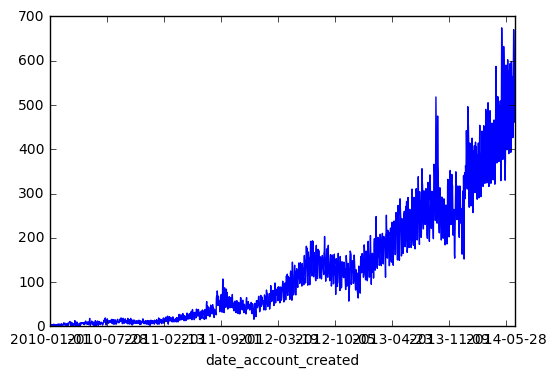

In [15]:
groupby_dac = train_df.groupby('date_account_created')['date_account_created'].count()
idx = groupby_dac.index
val = groupby_dac.values
print(idx)
print(val)
# plt.plot(kind='bar',x=idx,y=val)
groupby_dac.plot()

In [16]:
a = np.array([5,4])
b = [1]
a-b

array([4, 3])

-----
```
date_train_day = dac_train_date - dac_train_date.min()
```

same as below, np.array - list = each element in np.array - list

```
a = np.arrary([5, 4])
b = [1]
a - b
=> array([4,3])
```
-----
because of series/ndarray has no ploy, so we should make a dataframe to plot

In [18]:
dac_train_day = dac_train_date - dac_train_date.min()
# each day in dac_train_date will - dac_train_date.min()
dac_test_day = dac_test_date - dac_train_date.min()
# both are the distace from train_db

In [19]:
dac_train_day.days

array([1593, 1635, 1636, ...,   30,   44,    0], dtype=int64)

In [20]:
dac_train.values

array([674, 670, 636, ...,   1,   1,   1], dtype=int64)

In [21]:
dac_test_day.days

array([1664, 1663, 1658, 1665, 1659, 1662, 1699, 1698, 1670, 1678, 1671,
       1684, 1683, 1700, 1677, 1669, 1657, 1666, 1672, 1719, 1686, 1691,
       1713, 1679, 1680, 1661, 1685, 1706, 1676, 1697, 1727, 1660, 1668,
       1726, 1733, 1673, 1705, 1732, 1693, 1667, 1711, 1707, 1681, 1690,
       1694, 1649, 1656, 1692, 1688, 1712, 1725, 1721, 1687, 1702, 1643,
       1718, 1714, 1675, 1655, 1644, 1648, 1701, 1703, 1708, 1720, 1695,
       1650, 1689, 1651, 1696, 1722, 1682, 1715, 1642, 1716, 1704, 1674,
       1710, 1730, 1709, 1724, 1728, 1717, 1723, 1729, 1652, 1731, 1647,
       1653, 1645, 1646, 1654], dtype=int64)

In [22]:
dac_test.values

array([1105, 1052,  978,  923,  892,  888,  872,  841,  816,  790,  786,
        785,  781,  772,  772,  764,  757,  754,  751,  751,  742,  741,
        739,  739,  738,  738,  731,  729,  728,  725,  722,  712,  705,
        701,  699,  697,  694,  693,  679,  678,  677,  671,  671,  670,
        668,  665,  659,  659,  659,  658,  656,  652,  651,  648,  648,
        642,  638,  626,  625,  622,  618,  616,  614,  612,  612,  611,
        610,  609,  607,  606,  605,  603,  600,  599,  597,  592,  582,
        555,  548,  543,  540,  533,  532,  532,  531,  530,  520,  475,
        472,  445,  421,  401], dtype=int64)

<function matplotlib.pyplot.tight_layout>

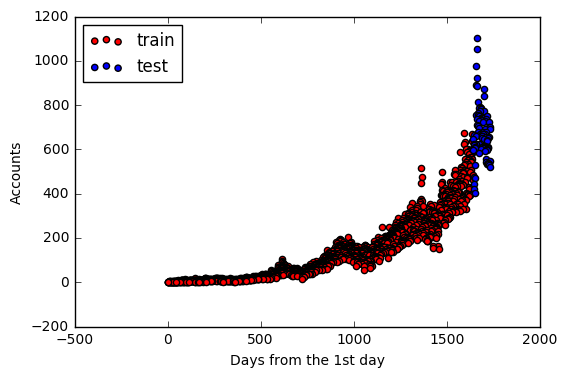

In [23]:
plt.scatter(dac_train_day.days,dac_train.values,c='r',label='train')
plt.scatter(dac_test_day.days,dac_test.values,c='b',label='test')

plt.xlabel('Days from the 1st day')
plt.ylabel('Accounts')
plt.legend(loc='upper left')
plt.tight_layout

# 以训练集的起始点为基准，后多少天 的 注册用户数
# 

## 1.2 timestamp_first_active

In [24]:
# str transfor to datetime type
pd.to_datetime('20180514231123')

Timestamp('2018-05-14 23:11:23')

In [25]:
train_df.timestamp_first_active.dtype

dtype('int64')

In [26]:
tfa_str = train_df.timestamp_first_active.astype('str')

In [27]:
tfa_train_dt = pd.to_datetime(tfa_str)
tfa_train_dt.head()

0   2009-03-19 04:32:55
1   2009-05-23 17:48:09
2   2009-06-09 23:12:47
3   2009-10-31 06:01:29
4   2009-12-08 06:11:05
Name: timestamp_first_active, dtype: datetime64[ns]

## 1.3 date_first_booking

In [28]:
dfb_train = train_df.date_first_booking
print(dfb_train.describe())
print('\nnull is:')
dfb_train.isnull().sum(axis=0)

count          88908
unique          1976
top       2014-05-22
freq             248
Name: date_first_booking, dtype: object

null is:


124543

# 2. Age

In [29]:
train_df.age.head()

0     NaN
1    38.0
2    56.0
3    42.0
4    41.0
Name: age, dtype: float64

In [30]:
train_df.age.isnull().sum()

87990

In [31]:
print('age max : {}'.format(train_df.age.max()))
print('age min : {}'.format(train_df.age.min()))

age max : 2014.0
age min : 1.0


In [32]:
label_train_age = pd.cut(train_df.age, bins=[-np.inf,14,20,30,60,70,80,100,np.inf],labels=['youth(<14)','teenager(14-20)','adult(20-30)','big adult(30-60)','aged(60-70)','old(70-80)','very old(80-100)','>100'])

In [33]:
label_train_age.value_counts()

big adult(30-60)    72911
adult(20-30)        41633
aged(60-70)          4656
teenager(14-20)      2412
>100                 2345
old(70-80)           1021
very old(80-100)      426
youth(<14)             57
Name: age, dtype: int64

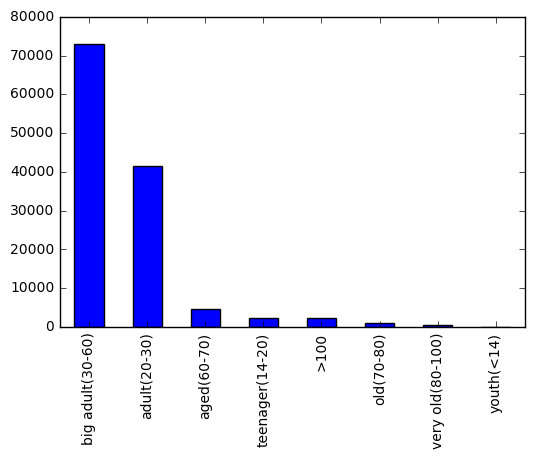

In [34]:
label_train_age.value_counts().plot(kind='bar')

In [35]:
train_df.age.value_counts().index

Float64Index([  30.0,   31.0,   29.0,   28.0,   32.0,   27.0,   33.0,   26.0,
                34.0,   35.0,
              ...
              1925.0, 1995.0, 1935.0, 1953.0, 1952.0, 1926.0, 1927.0, 1942.0,
              1938.0, 1933.0],
             dtype='float64', length=127)

In [36]:
train_df.age.value_counts().values

array([6124, 6016, 5963, 5939, 5855, 5738, 5527, 5044, 5029, 4860, 4459,
       4083, 3694, 3384, 3220, 2998, 2766, 2538, 2462, 2243, 2149, 2137,
       2056, 1875, 1702, 1646, 1469, 1387, 1337, 1331, 1210, 1131, 1102,
       1098, 1019, 1011,  982,  941,  915,  823,  780,  734,  710,  680,
        669,  593,  573,  549,  540,  516,  435,  402,  373,  276,  259,
        196,  189,  180,  149,  123,   94,   72,   68,   67,   50,   50,
         49,   48,   46,   45,   39,   34,   31,   31,   30,   27,   26,
         26,   26,   26,   26,   25,   25,   23,   23,   20,   18,   18,
         17,   17,   15,   15,   14,   13,   13,   12,   12,   12,   10,
          8,    7,    4,    3,    3,    3,    3,    2,    2,    2,    2,
          2,    2,    2,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1], dtype=int64)

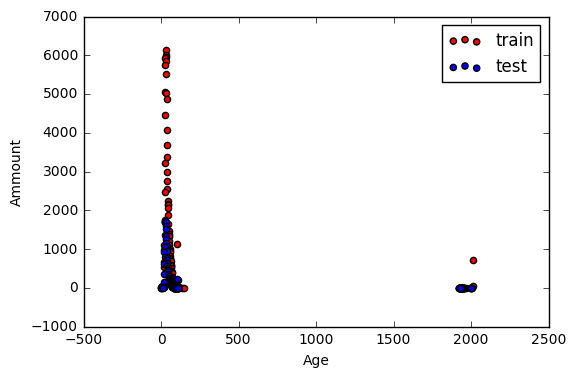

In [37]:
plt.scatter(train_df.age.value_counts().index,train_df.age.value_counts().values,c='r',label='train')
plt.scatter(test_df.age.value_counts().index,test_df.age.value_counts().values,c='b',label='test')
plt.xlabel('Age')
plt.ylabel('Ammount')
plt.legend(loc='best')
plt.tight_layout
plt.show()

- filter age < = 100, remove age > 100

In [38]:
filtered_tr_age = train_df.age[train_df.age<=100].value_counts()
filtered_te_age = test_df.age[test_df.age<=100].value_counts()

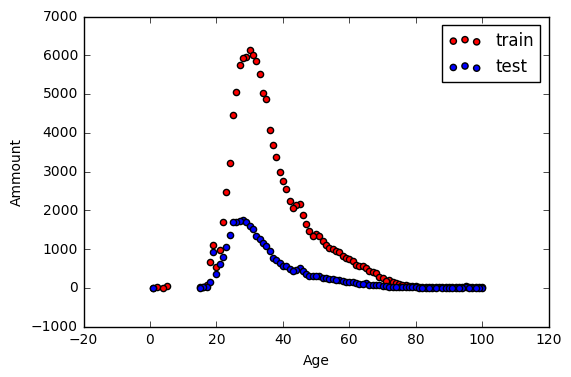

In [39]:
plt.scatter(filtered_tr_age.index,filtered_tr_age.values,c='r',label='train')
plt.scatter(filtered_te_age.index,filtered_te_age.values,c='b',label='test')
plt.xlabel('Age')
plt.ylabel('Ammount')
plt.legend(loc='best')
plt.tight_layout
plt.show()

- pivot
    - cut - label
    - stacked bar plot

In [62]:
train_df['age_label'] = pd.cut(train_df.age,bins=[0,10,20,30,40,50,60,70,80,90,100],
                      labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

In [63]:
# train_df.date_account_created.astype('str')

In [64]:
def year(var):
    if var<'2011-01-01':
        label = '2010'
    elif var<'2012-01-01':
        label = '2011'
    elif var<'2013-01-01':
        label = '2012'
    elif var<'2014-01-01':
        label = '2013'
    else: label = '2014'
    return label

train_df['dac_year'] = train_df.date_account_created.apply(year)

In [66]:
train_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_label,dac_year
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,2010
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,30-40,2011
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,50-60,2010
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,40-50,2011
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,40-50,2010


In [67]:
pivot_tr_age = pd.pivot_table(train_df, index='dac_year', columns=['age_label'], values=['age'],aggfunc='count')

In [68]:
pivot_tr_age

age                                                           \
age_label  0-10   10-20    20-30    30-40   40-50   50-60   60-70  70-80   
dac_year                                                                   
2010       48.0    38.0    299.0    750.0   296.0   147.0    78.0   17.0   
2011        1.0   129.0   1873.0   3184.0  1328.0   616.0   297.0   58.0   
2012        NaN   347.0   6970.0  10087.0  4375.0  2112.0  1012.0  224.0   
2013        6.0   724.0  15806.0  16841.0  7339.0  3898.0  1859.0  424.0   
2014        2.0  1174.0  16685.0  13350.0  5493.0  3095.0  1410.0  298.0   

                        
age_label 80-90 90-100  
dac_year                
2010        2.0    4.0  
2011       22.0   14.0  
2012       58.0   62.0  
2013       87.0   74.0  
2014       59.0   44.0

<function matplotlib.pyplot.tight_layout>

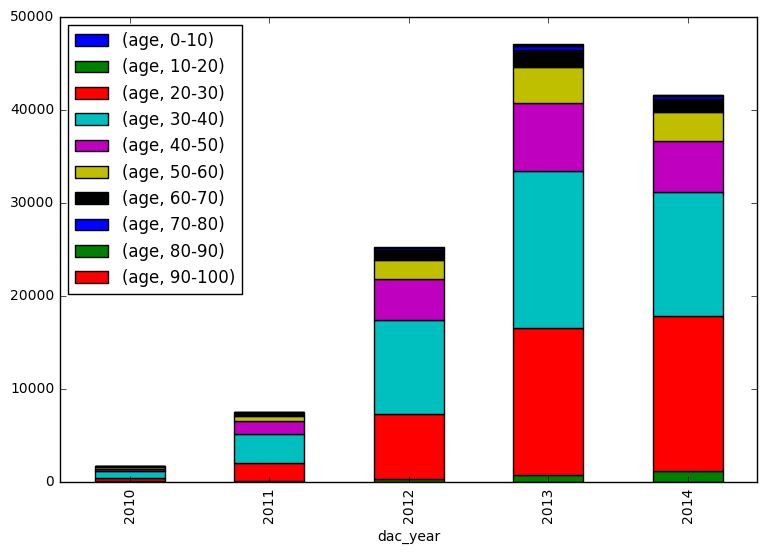

In [73]:
pivot_tr_age.plot(kind='bar',stacked=True,figsize=(9,6))
plt.legend(loc='best')
plt.tight_layout